In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [30]:
# all the imports
import random
import pandas as pd 
import folium
import matplotlib
matplotlib.use('TkAgg')  # specific only for mac bug graph plot
import matplotlib.pyplot as plt
%matplotlib inline
from src import get_api_posts_df_instagram, DATASETS_DIR, PROJECT_DIR, prepare_query

No handles with labels found to put in legend.


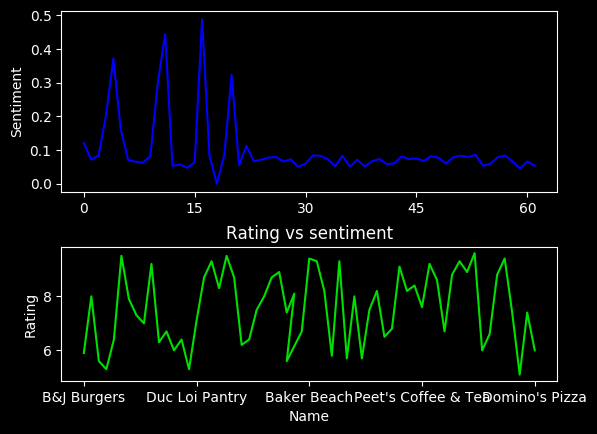

In [31]:
# plot sentiments and rating
df_final = pd.read_csv(DATASETS_DIR + 'result.csv', index_col=False)


color_list = ['#0000FF', '#01DF01', '#FF0000',
              '#BB12BE', '#CBC81B', '#00FFFF']
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
style_list = ['dark_background', 'ggplot']
matplotlib.pyplot.style.use(random.choice(style_list))
figure = matplotlib.pyplot.figure(tight_layout=False)
matplotlib.pyplot.legend(loc="best", fancybox=True, framealpha=0.1)

ax = matplotlib.pyplot.subplot2grid((8, 1), (0, 0), rowspan=4, colspan=1)
ax2 = matplotlib.pyplot.subplot2grid((8, 1), (5, 0), rowspan=3, colspan=1)

ax.plot(df_final['name'].index.values, df_final['inst_snt'].values,
        color_list[0], label='instagram sentiment')

matplotlib.pyplot.title("Rating vs sentiment")
ax.set_ylabel('Sentiment')
ax2.plot(df_final['name'].values, df_final['rating'].values,
        color_list[1], label='foursquare_rating')

ax2.set_ylabel('Rating')
matplotlib.pyplot.xlabel('Name')
matplotlib.pyplot.ylabel('Rating')

ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5))
ax2.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5))

plt.show()


In [32]:
# read total csv and create labels
df_final = pd.read_csv(DATASETS_DIR + 'result.csv')
label_list = []
for index, row in df_final.iterrows():
    label = row['name'] + '\n'
    label += 'Rating:' + str(row['rating']) + '\n'
    label += 'Sentiment:' + str(round(row['inst_snt'], 2))
    label_list.append(label)
df_final['label'] = label_list

In [33]:
# create map of Los Angeles using latitude and longitude values
map_la = folium.Map(location=[37.722, -122.395], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_final['lat'], df_final['long'], df_final['label']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_la)
    
map_la
